<a href="https://colab.research.google.com/github/Leonardogamu/mcd---aprendizaje_automatico_2025/blob/main/Tarea_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tarea 4**
## ○ Aplicando un método de filtro para mis datos
Utilizare el método de filtro:

ANOVA de valor $F$


In [1]:
import pandas as pd
data=pd.read_csv('/content/health_lifestyle_dataset.csv')
data['gender_bin'] = data['gender'].map({'Male': 0, 'Female': 1})
data['gender'] = data['gender_bin']
data.drop('gender_bin', axis=1, inplace=True) #recordamos la modificacion hecha en tareas previas

data



,id,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
0,1,56,0,20.5,4198,3.9,3.4,1602,0,0,97,161,111,240,0,0
1,2,69,1,33.3,14359,9.0,4.7,2346,0,1,68,116,65,207,0,0
2,3,46,0,31.6,1817,6.6,4.2,1643,0,1,90,123,99,296,0,0
3,4,32,1,38.2,15772,3.6,2.0,2460,0,0,71,165,95,175,0,0
4,5,60,1,33.6,6037,3.8,4.0,3756,0,1,98,139,61,294,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,53,0,33.1,4726,3.9,2.0,3118,0,1,56,105,76,282,0,0
99996,99997,22,0,35.1,11554,4.5,3.1,1967,0,0,51,149,77,192,0,0
99997,99998,37,0,18.9,3924,3.8,1.0,2328,0,0,69,92,117,218,0,0
99998,99999,72,1,27.8,16110,5.6,0.8,3093,0,0,93,164,72,188,0,0


In [3]:
x = data[[
    #'Id',
    'age',
    'gender',
    'bmi',
    'daily_steps',
    'sleep_hours',
    'water_intake_l',
    'calories_consumed',
    'smoker',
    'alcohol',
    'resting_hr',
    'systolic_bp',
    'diastolic_bp',
    'cholesterol',
    'family_history'
]]
y = data[['disease_risk']]
#Tenemos como Y la variable de disease risk (riesgo de enfermedad)
#Mientras como X el resto de variables (Edad, presion arterial, pasos diarios, etc)


In [4]:
from sklearn.feature_selection import f_regression
valor_f = f_regression(x,y) #ANOVA F
valor_f

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([0.27934465, 0.3828914 , 1.28573796, 1.1863304 , 0.66674532,
        0.36169691, 0.74921306, 0.12649825, 0.02656715, 2.95573677,
        0.11788702, 1.42444263, 1.55306183, 1.04034651]),
 array([0.59713225, 0.53606126, 0.2568376 , 0.27607363, 0.41419059,
        0.54756668, 0.38672757, 0.72209151, 0.87052324, 0.08557639,
        0.7313383 , 0.23267638, 0.21268692, 0.30774336]))

In [5]:
pasan= []
no_pasan = []
alpha = 0.05

for i in range(len(valor_f[1])):
    if valor_f[1][i]< alpha:
      pasan.append(x.columns[i])
    else:
      no_pasan.append(x.columns[i])
#Prueba de hipotesis
#H0: Xn no tiene relacion lineal significativa con Y (Riesgo de enfermedad)
#H0: Xn si tiene relacion lineal significativa con Y (Riesgo de enfermedad)
#Se rechaza H0 si p-valor < alpha
#Veremos cuales variables cumplen o no esta prueba de significancia

In [6]:
pasan

[]

In [7]:
no_pasan
#me preocupa que todos no hayan pasado
#pues nos indicaria que ninguna variable tiene relacion lineal significativa con Y
#Osea, podrian haber relaciones pero serian debiles

['age',
 'gender',
 'bmi',
 'daily_steps',
 'sleep_hours',
 'water_intake_l',
 'calories_consumed',
 'smoker',
 'alcohol',
 'resting_hr',
 'systolic_bp',
 'diastolic_bp',
 'cholesterol',
 'family_history']

In [8]:
df_resultados = pd.DataFrame(valor_f[0],index=x.columns, columns = ['valor_f']).sort_values('valor_f',ascending = False)
df_resultados
#Con los resultados del valor F podremos ver que variables tienen mas fuerza sobre Y
#Osea, que variables con el valor F mas alto, son aquellas que mas explican o mueven la respuesta de Y

,valor_f
resting_hr,2.955737
cholesterol,1.553062
diastolic_bp,1.424443
bmi,1.285738
daily_steps,1.186330
family_history,1.040347
calories_consumed,0.749213
sleep_hours,0.666745
gender,0.382891
water_intake_l,0.361697


<function matplotlib.pyplot.show(close=None, block=None)>

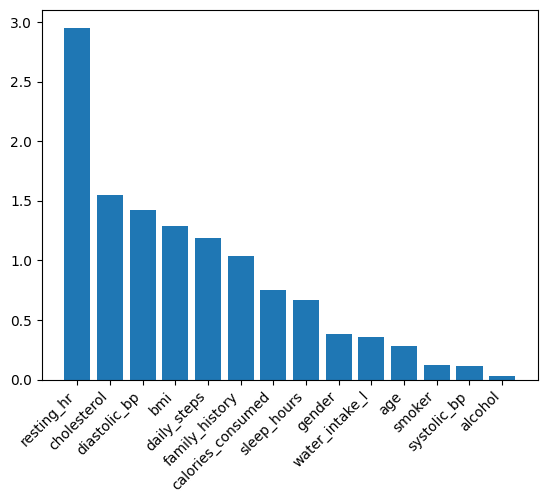

In [10]:
import matplotlib.pyplot as plt
plt.figure()
plt.xticks(rotation=45, ha='right')
plt.bar(df_resultados.index,df_resultados.valor_f)
plt.show


Concluyendo, a pesar de que obtuvimos en nuestra prueba de hipotesis que ninguna variable presenta una relacion lineal significativa con Y (Riesgo de enfermedad).

Mediante el valor F podemos ver que la frecuencia cardíaca en reposo (resting_hr), el nivel de colesterol en sangre (cholesterol) y la presión arterial diastólica (diastolic_bp) son las principales 3 variables que explican el comportamiento o la variabilidad de Y (Riesgo de enfermedad).

Principalmente la frecuencia cardíaca en reposo es la que mas presenta peso en la variabilidad, lo cual bajo un contexto medico o de salud nos hacen todo el sentido del mundo. Debido a que existen estudios que respaldan el impacto tanto de la presion arterial como del desgaste del corazon con el paso del tiempo, en la salud del humano.

Aun y con lo anterior, sigue causandome ruido el hecho de que la prueba de filtro utilizada (Anova de valor F) nos haya arrojado que las variables "predictoras" no presentan relacion con la variable respuesta, lo cual se habia tambien revisado en tareas anteriores.

## ○ Aplicando modelos de selección de características

###1. Exhaustive Feature Selection (EFS)

In [13]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

efs = EFS(estimator = LinearRegression(),
          min_features = 1,
          max_features = 5,
          scoring = 'neg_mean_absolute_error',
          cv = 5)
#dejare como 5 el maximo de caracteristicas para que no tarde mucho (ya me tardo 8 minutos corriendo mejor le bajare)

In [14]:
efs = efs.fit(x, y)

Features: 3472/3472

In [15]:
efs.best_score_

np.float64(-0.3731866210217153)

In [16]:
efs.best_feature_names_
#Aqui tenemos la mejor combinacion

('bmi', 'sleep_hours', 'resting_hr', 'diastolic_bp', 'family_history')

In [28]:
df_resultados_efs = pd.DataFrame(efs.get_metric_dict()).T
df_resultados_efs = df_resultados_efs.sort_values('avg_score', ascending = False)
df_resultados_efs_definitivo = df_resultados_efs.head(5)
df_resultados_efs_definitivo
#Me traje las primeras 5 mejores combinaciones, porque la tabla sin un limite tardaba mucho en ejecutarse

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
2878,"(2, 4, 9, 11, 13)","[-0.3730738340664525, -0.37308981723114865, -0...",-0.373187,"(bmi, sleep_hours, resting_hr, diastolic_bp, f...",0.000338,0.000263,0.000131
2344,"(1, 2, 9, 11, 13)","[-0.37307808019255306, -0.37308774802580286, -...",-0.373188,"(gender, bmi, resting_hr, diastolic_bp, family...",0.00034,0.000265,0.000132
3006,"(2, 9, 10, 11, 13)","[-0.3730727610748784, -0.37309098278644875, -0...",-0.373188,"(bmi, resting_hr, systolic_bp, diastolic_bp, f...",0.000339,0.000263,0.000132
1134,"(2, 9, 11, 13)","[-0.37307157214466113, -0.3730911676089443, -0...",-0.373188,"(bmi, resting_hr, diastolic_bp, family_history)",0.000341,0.000265,0.000132
2548,"(1, 4, 9, 11, 13)","[-0.3730839992653502, -0.3730970239283434, -0....",-0.373188,"(gender, sleep_hours, resting_hr, diastolic_bp...",0.000336,0.000262,0.000131


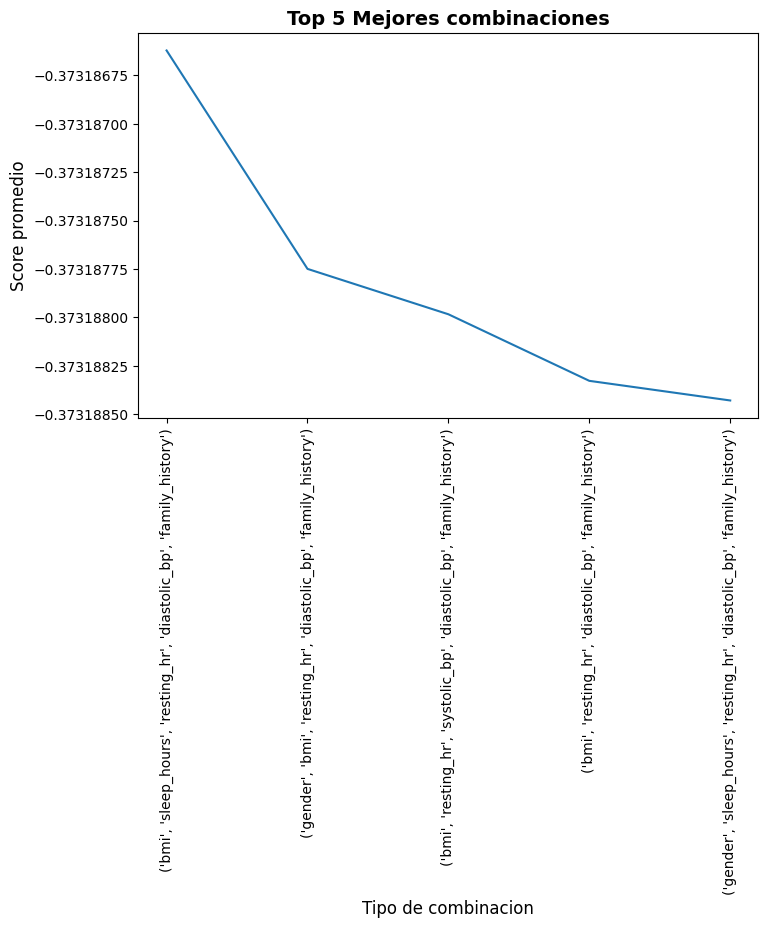

In [32]:

plt.figure(figsize=(8, 5))

plt.plot(
    df_resultados_efs_definitivo.iloc[:5].feature_names.astype(str),
    df_resultados_efs_definitivo.iloc[:5].avg_score.astype(float),
)

plt.xticks(rotation = 90)
plt.yticks(fontsize=10)
plt.title("Top 5 Mejores combinaciones", fontsize=14, fontweight='bold')
plt.xlabel("Tipo de combinacion", fontsize=12)
plt.ylabel("Score promedio", fontsize=12)
plt.plot()
plt.ticklabel_format(style='plain', axis='y', useOffset=False)

###2. Sequential Forward Selection (SFS)

In [42]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(estimator = LinearRegression(),
          k_features = (1, 7),
          forward = False,
          scoring = 'neg_mean_absolute_error',
          cv=5)

In [43]:
sfs = sfs.fit(x, y)

In [44]:
sfs.k_score_

np.float64(-0.3731856979662583)

In [45]:
sfs.k_feature_names_

('gender',
 'bmi',
 'sleep_hours',
 'resting_hr',
 'systolic_bp',
 'diastolic_bp',
 'family_history')

In [46]:
pd.DataFrame(sfs.subsets_).T.sort_values('avg_score', ascending = False)

,feature_idx,cv_scores,avg_score,feature_names
7,"(1, 2, 4, 9, 10, 11, 13)","[-0.37308149347936653, -0.37308624761901493, -...",-0.373186,"(gender, bmi, sleep_hours, resting_hr, systoli..."
6,"(1, 2, 4, 9, 11, 13)","[-0.373080278952684, -0.3730864323757939, -0.3...",-0.373186,"(gender, bmi, sleep_hours, resting_hr, diastol..."
5,"(2, 4, 9, 11, 13)","[-0.3730738340664525, -0.37308981723114865, -0...",-0.373187,"(bmi, sleep_hours, resting_hr, diastolic_bp, f..."
8,"(1, 2, 4, 8, 9, 10, 11, 13)","[-0.3730804172670959, -0.3730874293757666, -0....",-0.373187,"(gender, bmi, sleep_hours, alcohol, resting_hr..."
9,"(1, 2, 4, 8, 9, 10, 11, 12, 13)","[-0.3730671195109216, -0.3730829937600392, -0....",-0.373188,"(gender, bmi, sleep_hours, alcohol, resting_hr..."
4,"(2, 9, 11, 13)","[-0.37307157214466113, -0.3730911676089443, -0...",-0.373188,"(bmi, resting_hr, diastolic_bp, family_history)"
10,"(1, 2, 4, 6, 8, 9, 10, 11, 12, 13)","[-0.3730641665523373, -0.37310846956599597, -0...",-0.373189,"(gender, bmi, sleep_hours, calories_consumed, ..."
3,"(9, 11, 13)","[-0.3730752827010644, -0.37310178724792015, -0...",-0.373191,"(resting_hr, diastolic_bp, family_history)"
11,"(0, 1, 2, 4, 6, 8, 9, 10, 11, 12, 13)","[-0.37306345432889293, -0.37311026232401256, -...",-0.373192,"(age, gender, bmi, sleep_hours, calories_consu..."
2,"(9, 11)","[-0.3730780020712429, -0.3730961992297657, -0....",-0.373193,"(resting_hr, diastolic_bp)"


In [48]:
df_resultados_sfs_definitivo = pd.DataFrame(sfs.subsets_).T.sort_values('avg_score', ascending = False).head(5)
df_resultados_sfs_definitivo
#Para hacer el grafico, tomare los top 5 asi como en el EFS

,feature_idx,cv_scores,avg_score,feature_names
7,"(1, 2, 4, 9, 10, 11, 13)","[-0.37308149347936653, -0.37308624761901493, -...",-0.373186,"(gender, bmi, sleep_hours, resting_hr, systoli..."
6,"(1, 2, 4, 9, 11, 13)","[-0.373080278952684, -0.3730864323757939, -0.3...",-0.373186,"(gender, bmi, sleep_hours, resting_hr, diastol..."
5,"(2, 4, 9, 11, 13)","[-0.3730738340664525, -0.37308981723114865, -0...",-0.373187,"(bmi, sleep_hours, resting_hr, diastolic_bp, f..."
8,"(1, 2, 4, 8, 9, 10, 11, 13)","[-0.3730804172670959, -0.3730874293757666, -0....",-0.373187,"(gender, bmi, sleep_hours, alcohol, resting_hr..."
9,"(1, 2, 4, 8, 9, 10, 11, 12, 13)","[-0.3730671195109216, -0.3730829937600392, -0....",-0.373188,"(gender, bmi, sleep_hours, alcohol, resting_hr..."


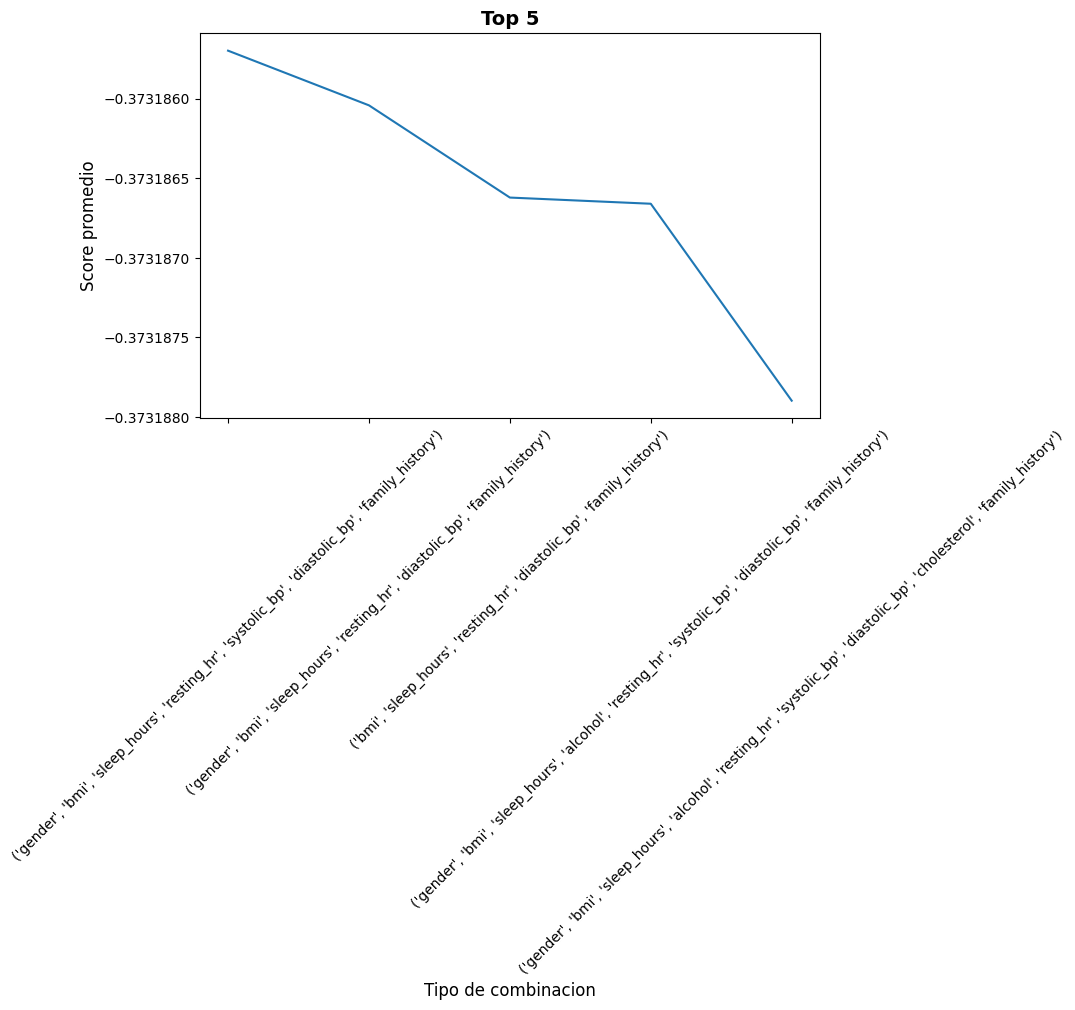

In [54]:
plt.figure(figsize=(8, 5))

plt.plot(
    df_resultados_sfs_definitivo.iloc[:5].feature_names.astype(str),
    df_resultados_sfs_definitivo.iloc[:5].avg_score.astype(float),
)

plt.xticks(rotation = 45)
plt.yticks(fontsize=10)
plt.title("Top 5", fontsize=14, fontweight='bold')
plt.xlabel("Tipo de combinacion", fontsize=12)
plt.ylabel("Score promedio", fontsize=12)
plt.plot()
plt.ticklabel_format(style='plain', axis='y', useOffset=False)

Para que no se hiciera tan gigante el grafico cambie la rotacion de las combinaciones, pero aun se aprecian de una buena manera.

# Concluyendo

Con base a lo investigado en otras fuentes y lo visto con los modelos de selección, opto por utilizar la siguiente selección:
##1. Gender (Género)
##2. bmi    (IMC)
##3. sleep_hours (Horas de sueño)
##4. resting_hr (Frecuencia cardíaca en reposo)
##5. systolic_bp (Presión arterial sistólica)
##6. diastolic_bp (Presión arterial diastólica)
##7. family_history (Historial familiar de enfermedades)

No solo basandome en el modelo SFS, tambien tomando en cuenta los resultados del método ANOVA utilizado, asi como lo visto en distintas fuentes, donde los indicadores mas cruciales para determinar el riesgo de enfermedades.

Principalmente BMI asi como el comportamiento del sistema cardiovascular (presión arterial e incluso la frecuencia cardíaca en reposo) son factores que estan directamente relacionados con enfermedades cardiovasculares y metabólicas.

Dentro del estilo de vida, de los hábitos, es lógico que una de las más importantes sean las horas de sueño, e inclusive el historial familiar, el cual descubre en muchas ocasiones hábitos que se transmiten en familias de generación en generación.

Por lo que creo que solo estos 7 factores son los mas cruciales para determinar un riesgo de presentar enfermedades, mientras que variables como los pasos diarios (daily steps) o el consumo de calorias o agua (calories_consumed, water_intake_l) podrian no ser tan determinantes debido a que existen distintos casos en los que los casos atípicos podrian no hablar directamente de un riesgo.

 # Fuentes

 - [Informe sobre las consecuencias de la hipertensión – Texas Heart Institute](https://www.texasheart.org/heart-health/heart-information-center/topics/presion-arterial-alta-hipertension-arterial/),
 - [Artículo sobre los desordenes del sueño y la salud cardiovascular – American Heart Association](https://www.heart.org/en/health-topics/sleep-disorders/sleep-and-heart-health),
 - [Informe sobre relaciones entre IMC altos y enfermedades cardiovasculares – European Society of Cardiology](https://www.escardio.org/The-ESC/Press-Office/Press-releases/Two-thirds-of-deaths-related-to-high-BMI-are-due-to-cardiovascular-diseases-ESC-Clinical-Consensus-Statement-on-Obesity-and-Cardiovascular-Disease),

 No se si cuente tambien pero hace unos dias fui con un cardiólogo y le pregunte sobre los factores mas determinantes para evitar una enfermedad.
